In [1]:
!unzip data.zip #Descomprime la carpeta

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: data/test_prepared/06646.png  
 extracting: data/test_prepared/08013.png  
 extracting: data/test_prepared/05006.png  
 extracting: data/test_prepared/01747.png  
 extracting: data/test_prepared/08006.png  
 extracting: data/test_prepared/03231.png  
 extracting: data/test_prepared/05240.png  
 extracting: data/test_prepared/03732.png  
 extracting: data/test_prepared/09868.png  
 extracting: data/test_prepared/05120.png  
 extracting: data/test_prepared/12523.png  
 extracting: data/test_prepared/10590.png  
 extracting: data/test_prepared/11227.png  
 extracting: data/test_prepared/04026.png  
 extracting: data/test_prepared/06894.png  
 extracting: data/test_prepared/06080.png  
 extracting: data/test_prepared/12147.png  
 extracting: data/test_prepared/07862.png  
 extracting: data/test_prepared/11371.png  
 extracting: data/test_prepared/02423.png  
 extracting: data/test_prepared/09561.png  
 extracting: da

#  Práctica Obligatoria - Parte III - CNN

***<p style="text-align:center;">Aprendizaje Automático II</p>***
***<p style="text-align:center;">CNNs</p>***

En esta parte, entrenarás varias redes CNNs y analizarás sus resultados en el dataset GTS.


### Evaluación - 4/10 puntos

Puntuación de cada parte sobre el total de la práctica:
- **[Ejercicio 1]** 0.25 puntos.
- **[Ejercicio 2]** 0.25 puntos.
- **[Ejercicio 3]** 0.5 puntos.
- **[Ejercicio 4]** 3 puntos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim import SGD
from torch.optim import Adam

from gts_dataset import GTS


## Importa las funciones que has creado desde `utils.py`:

In [3]:
from utils import count_trainable_params, train, evaluate, train_and_evaluate, save_full_model, load_full_model, plot_loss_accuracy, plot_confusion_matrix, plot_error_per_class

## Carga el dataset GTS  y crea los dataloaders:

In [4]:
# Definir las transformaciones y conversión a tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = GTS(csv_file='train.csv', root_dir='./data', transform=transform)
valid_dataset = GTS(csv_file='valid.csv', root_dir='./data', transform=transform)
test_dataset = GTS(csv_file='test.csv', root_dir='./data', transform=transform)

device = 'cuda'
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

## **[Ejercicio 1]** Crea un modelo `CNN` con las siguientes características:

1. Tres bloques convolucionales (conv2d -> batch norm -> ReLU).
2. Flatten para aplanar características.
3. Una capa densa para clasificación.
4. Comprueba el número de parámetros entrenables y busca una configuración que no supere los **50.000** parámetros (aproximadamente 4 veces menos que la MLP).

In [5]:
class CNN(nn.Module):
    def __init__(self, output_dim):
        super(CNN, self).__init__()

        # Primer bloque convolucional
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),

        )
        # Segundo bloque convolucional
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

        )
        # Tercer bloque convolucional
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

        )
        # Capa de aplanado
        self.flatten= nn.Flatten()

        # Linear para la clasificación
        self.fully_conected= nn.Linear(32 * 4* 4, output_dim)

    def forward(self, x):
        # Primer bloque convolucional
        x= self.conv_block1(x)

        # Segundo bloque convolucional
        x= self.conv_block2(x)

        # Tercer bloque convolucional
        x= self.conv_block3(x)

        # Aplanar la salida de la última capa convolucional
        x= self.flatten(x)

        # Linear para clasificación
        x= self.fully_conected(x)

        return x

count_trainable_params(CNN(output_dim=43))

45627

Guarda el modelo en `models.py`

### Entrena el modelo CNN con las funciones que has importado y analiza los resultados:

In [6]:
device='cpu'

Epoch [1/10], Train Loss: 1.0068, Train Accuracy: 0.7304, Validation Loss: 0.3601, Validation Accuracy: 0.9018
Epoch [2/10], Train Loss: 0.2393, Train Accuracy: 0.9354, Validation Loss: 0.2284, Validation Accuracy: 0.9318
Epoch [3/10], Train Loss: 0.1310, Train Accuracy: 0.9655, Validation Loss: 0.1955, Validation Accuracy: 0.9421
Epoch [4/10], Train Loss: 0.0896, Train Accuracy: 0.9739, Validation Loss: 0.1992, Validation Accuracy: 0.9404
Epoch [5/10], Train Loss: 0.0752, Train Accuracy: 0.9778, Validation Loss: 0.1581, Validation Accuracy: 0.9528
Epoch [6/10], Train Loss: 0.0521, Train Accuracy: 0.9846, Validation Loss: 0.1454, Validation Accuracy: 0.9600
Epoch [7/10], Train Loss: 0.0521, Train Accuracy: 0.9842, Validation Loss: 0.1444, Validation Accuracy: 0.9611
Epoch [8/10], Train Loss: 0.0400, Train Accuracy: 0.9884, Validation Loss: 0.1474, Validation Accuracy: 0.9618
Epoch [9/10], Train Loss: 0.0359, Train Accuracy: 0.9892, Validation Loss: 0.2001, Validation Accuracy: 0.9449
E

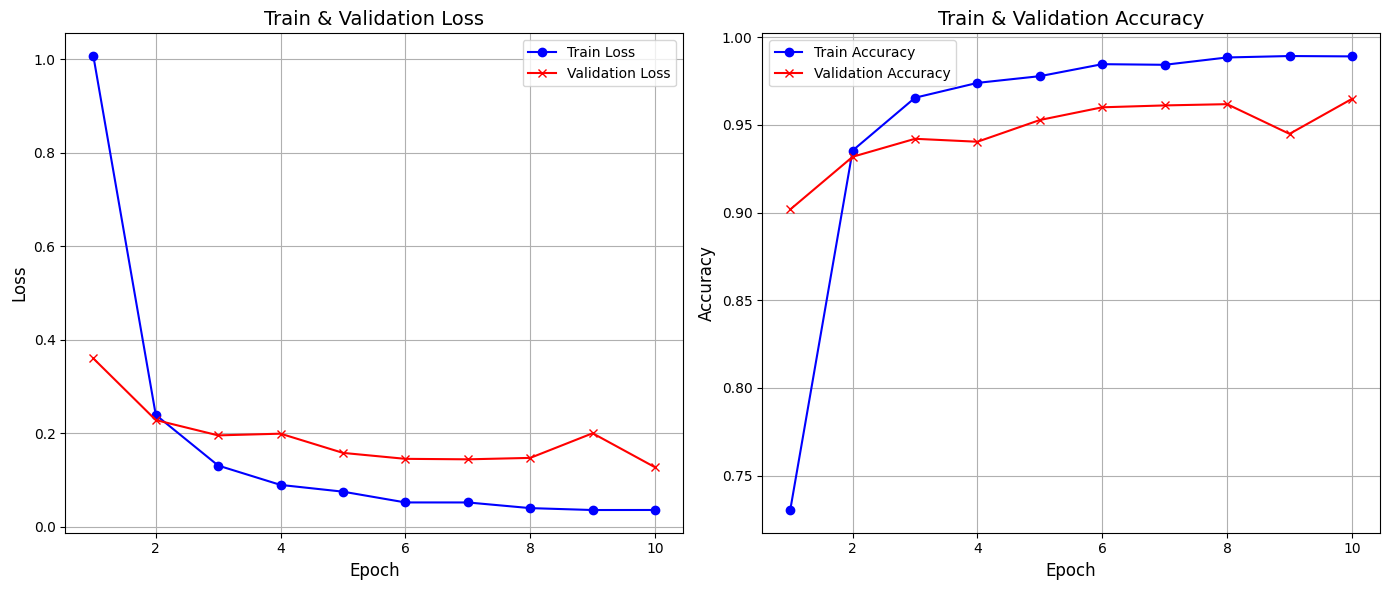

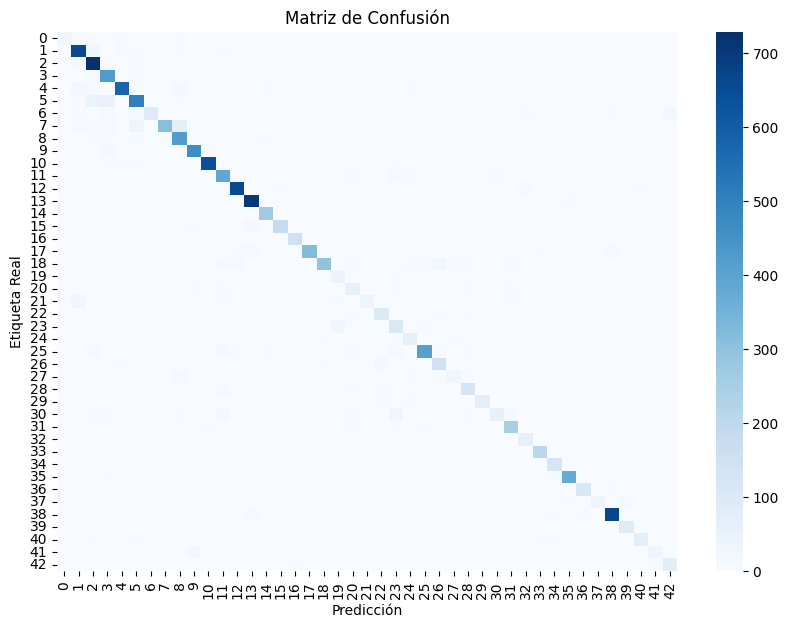

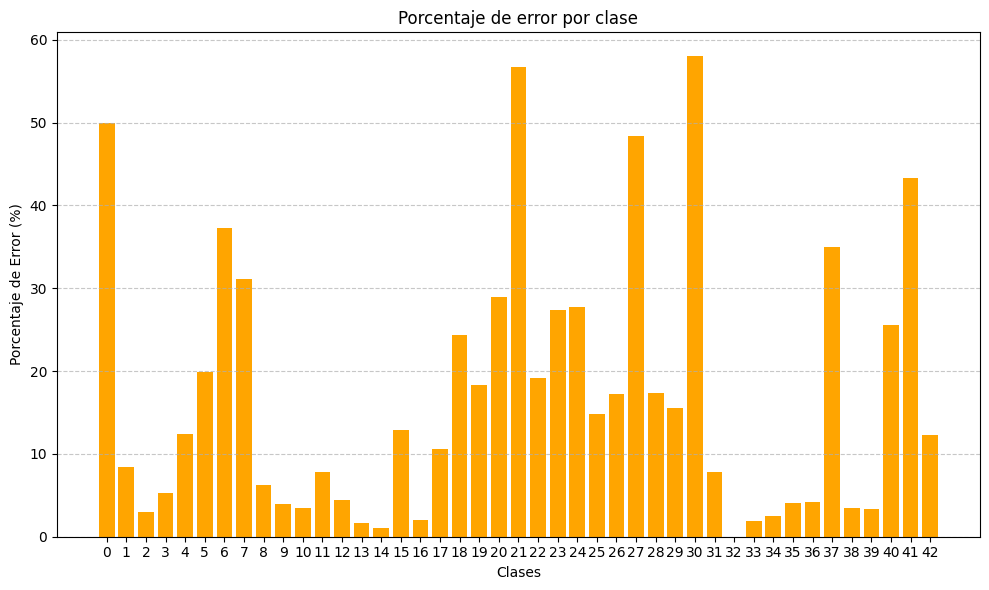

In [7]:
# Instancia el modelo
model_cnn = CNN(output_dim=43).to(device)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model_cnn.parameters(), lr= 0.001, weight_decay= 1e-4)


# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='cnn'

train_loss_df, val_loss_df, test_loss, test_accuracy =  train_and_evaluate(model_cnn,
                                                                           train_loader, valid_loader,
                                                                           loss_fn, optimizer, device,
                                                                           num_epochs,
                                                                           test_loader, 'cnn')

# Guarda el modelo con
file_name='cnn.pth'
save_full_model(model_cnn, file_name)


# Carga los datos y muéstralos
train_loss_file = 'train_loss_cnn.csv'
valid_loss_file = 'valid_loss_cnn.csv'
train_accuracy_file = 'train_accuracy_cnn.csv'
valid_accuracy_file = 'valid_accuracy_cnn.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model_cnn, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

Describe las diferencias en los resultados que has obtenido.


############## COMPLETAR ##############

La CNN funciona mejor que la MLP logrando una precisión de 88,92% frente al 77,18% de la MLP y con solo una cuarta parte de los parámetros. Esto se debe a que la CNN aprovecha las relaciones estadísticas locales entre píxeles gracias a los filtros convolucionales, ampliando su "receptive field" a mayor profundidad.

Aunque presenta cierto sobreajuste, la CNN muestra un mejor rendimiento general.

########### Fin COMPLETAR ############

## **[Ejercicio 2]** Dataset permutado: re-entrena la MLP y la CNN

Esta vez, vuelve a entrenar la `MLP`y la `CNN` que has configurado pero con el mismo dataset modificado.

Esta modificación consiste en permutar los píxeles de las imágenes siempre de la misma manera.


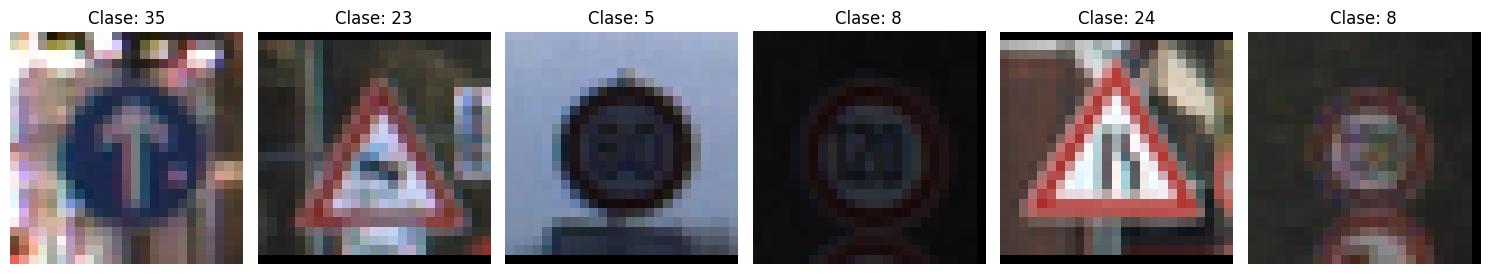

In [8]:
def visualize_subset(dataset, num_images=6):
    """
    Visualiza ejemplos directamente de un Subset o Dataset.

    :param dataset: Dataset o Subset que contiene las imágenes y etiquetas.
    :param num_images: Número de imágenes a mostrar.
    """
    indices = np.arange(num_images)
    images = []
    labels = []

    for idx in indices:
        image, label = dataset[idx]
        images.append(image)
        labels.append(label)

    images = torch.stack(images)  # Convertir la lista de imágenes en un tensor
    images = images.permute(0, 2, 3, 1).numpy()


    # Mostrar imágenes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for idx in range(num_images):
        axes[idx].imshow(images[idx])
        axes[idx].set_title(f"Clase: {labels[idx]}")
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()


# Visualizar ejemplos del conjunto de entrenamiento
visualize_subset(train_dataset)

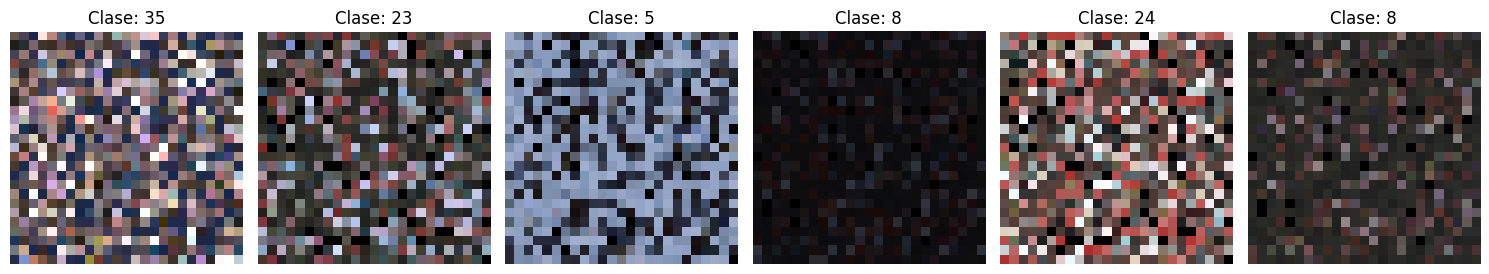

In [9]:
class ShufflePixels:
    def __init__(self, seed=42):
        """
        Inicializa la transformación de shuffle de píxeles.
        Args:
            seed (int): Semilla para generar una permutación fija.
        """
        self.seed = seed
        torch.manual_seed(self.seed)  # Fijar la semilla
        self.permutation = None

    def __call__(self, img):
        """
        Aplica la permutación a los píxeles de la imagen.
        Args:
            img (torch.Tensor): Imagen en formato (C, H, W).
        Returns:
            torch.Tensor: Imagen con píxeles permutados.
        """
        C, H, W = img.shape  # Extraer dimensiones de la imagen

        if self.permutation is None:
            # Generar permutación fija
            self.permutation = torch.randperm(H * W)  # Permutación fija en 1D

        # Aplanar la imagen, permutar y restaurar forma original
        img = img.view(C, H * W)  # (C, H * W)
        img = img[:, self.permutation]  # Aplicar la permutación
        img = img.view(C, H, W)  # Restaurar la forma original
        return img

# Definir las transformaciones con shuffle de píxeles
transform = transforms.Compose([
    transforms.ToTensor(),
    ShufflePixels(seed=42)  # Aplicar shuffle fijo
])
train_dataset_shuffle = GTS(csv_file='train.csv', root_dir='./data', transform=transform)
valid_dataset_shuffle = GTS(csv_file='valid.csv', root_dir='./data', transform=transform)
test_dataset_shuffle = GTS(csv_file='test.csv', root_dir='./data', transform=transform)

device = 'cpu'
batch_size = 16

train_loader_shuffle = DataLoader(train_dataset_shuffle, batch_size=batch_size, shuffle=True, num_workers=2)
valid_loader_shuffle = DataLoader(valid_dataset_shuffle, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader_shuffle = DataLoader(test_dataset_shuffle, batch_size=batch_size, shuffle=False, num_workers=2)


# Visualizar ejemplos del conjunto de entrenamiento
visualize_subset(train_dataset_shuffle)

### Entrena la MLP con:

* `train_loader_shuffle`
* `valid_loader_shuffle`
* `test_loader_shuffle`

Guarda el modelo como `mlp_shuffle.pth` y los resultados de `loss` y `accuracy`con la misma extensión:

Epoch [1/10], Train Loss: 2.4038, Train Accuracy: 0.3813, Validation Loss: 1.7053, Validation Accuracy: 0.5407
Epoch [2/10], Train Loss: 1.3385, Train Accuracy: 0.6460, Validation Loss: 1.1683, Validation Accuracy: 0.6765
Epoch [3/10], Train Loss: 0.9476, Train Accuracy: 0.7522, Validation Loss: 0.8650, Validation Accuracy: 0.7777
Epoch [4/10], Train Loss: 0.7639, Train Accuracy: 0.8010, Validation Loss: 0.7744, Validation Accuracy: 0.7974
Epoch [5/10], Train Loss: 0.6435, Train Accuracy: 0.8331, Validation Loss: 0.6925, Validation Accuracy: 0.8103
Epoch [6/10], Train Loss: 0.5810, Train Accuracy: 0.8486, Validation Loss: 0.5731, Validation Accuracy: 0.8542
Epoch [7/10], Train Loss: 0.5220, Train Accuracy: 0.8661, Validation Loss: 0.5416, Validation Accuracy: 0.8606
Epoch [8/10], Train Loss: 0.4804, Train Accuracy: 0.8768, Validation Loss: 0.5162, Validation Accuracy: 0.8657
Epoch [9/10], Train Loss: 0.4500, Train Accuracy: 0.8858, Validation Loss: 0.4991, Validation Accuracy: 0.8655
E

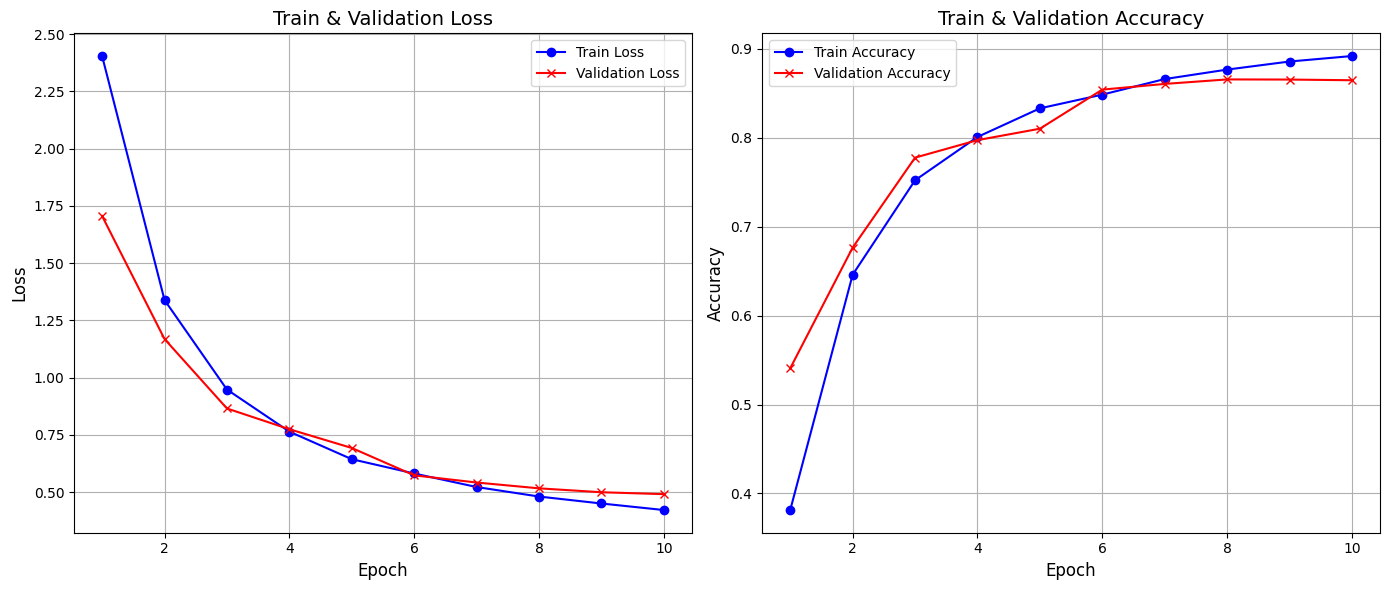

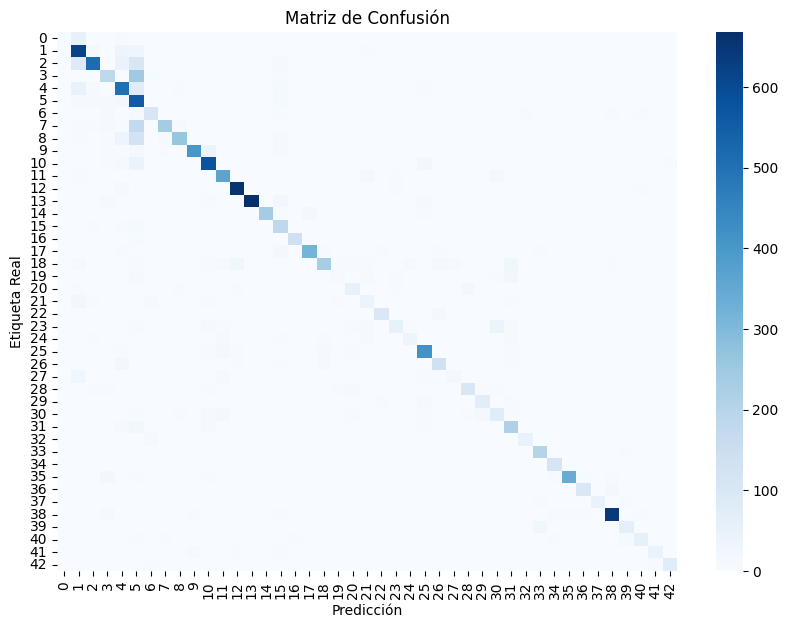

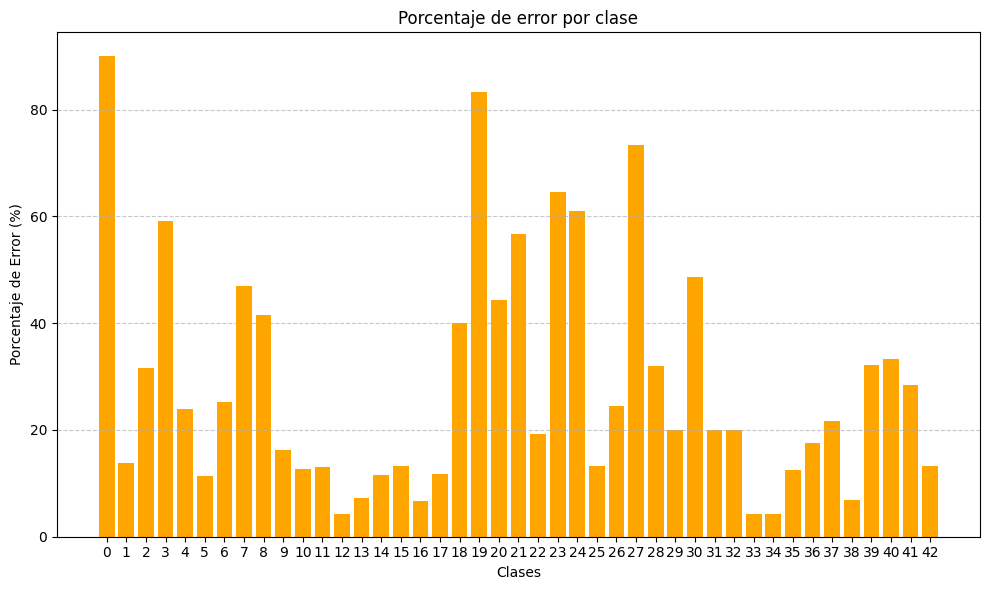

In [10]:
from models import MLP

# Instancia el modelo

image, id = train_dataset[0]
c, w, h= image.shape
input_dim= c*w*h

output_dim= 43
hidden_dim= 104

model_mlp_shuffle = MLP(input_dim, hidden_dim, output_dim)

# Instancia la función de pérdida y el optimizador
loss_fn =nn.CrossEntropyLoss()
optimizer = Adam(model_mlp_shuffle.parameters(), lr= 0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='mlp_shuffle'
train_loss_df, val_loss_df, test_loss, test_accuracy = train_and_evaluate(model_mlp_shuffle,
                                                                           train_loader_shuffle, valid_loader_shuffle,
                                                                           loss_fn, optimizer, device,
                                                                           num_epochs,
                                                                           test_loader_shuffle, 'mlp_shuffle')



# Guarda el modelo. Usa
file_name='mlp_shuffle.pth'
save_full_model(model_mlp_shuffle, file_name)

# Carga los datos y muéstralos
train_loss_file = 'train_loss_mlp_shuffle.csv'
valid_loss_file = 'valid_loss_mlp_shuffle.csv'
train_accuracy_file = 'train_accuracy_mlp_shuffle.csv'
valid_accuracy_file = 'valid_accuracy_mlp_shuffle.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model_mlp_shuffle, test_loader_shuffle, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)


### Entrena la CNN con:

* `train_loader_shuffle`
* `valid_loader_shuffle`
* `test_loader_shuffle`

Guarda el modelo como `cnn_shuffle.pth` y los resultados de `loss`y `accuracy` con la misma extensión:

Epoch [1/10], Train Loss: 1.2264, Train Accuracy: 0.6582, Validation Loss: 0.5928, Validation Accuracy: 0.8266
Epoch [2/10], Train Loss: 0.4426, Train Accuracy: 0.8661, Validation Loss: 0.4195, Validation Accuracy: 0.8717
Epoch [3/10], Train Loss: 0.2935, Train Accuracy: 0.9111, Validation Loss: 0.4094, Validation Accuracy: 0.8683
Epoch [4/10], Train Loss: 0.2175, Train Accuracy: 0.9334, Validation Loss: 0.3725, Validation Accuracy: 0.8884
Epoch [5/10], Train Loss: 0.1696, Train Accuracy: 0.9464, Validation Loss: 0.3516, Validation Accuracy: 0.8935
Epoch [6/10], Train Loss: 0.1447, Train Accuracy: 0.9535, Validation Loss: 0.3350, Validation Accuracy: 0.9029
Epoch [7/10], Train Loss: 0.1216, Train Accuracy: 0.9602, Validation Loss: 0.3252, Validation Accuracy: 0.9099
Epoch [8/10], Train Loss: 0.1103, Train Accuracy: 0.9634, Validation Loss: 0.3359, Validation Accuracy: 0.9039
Epoch [9/10], Train Loss: 0.1027, Train Accuracy: 0.9665, Validation Loss: 0.3284, Validation Accuracy: 0.9128
E

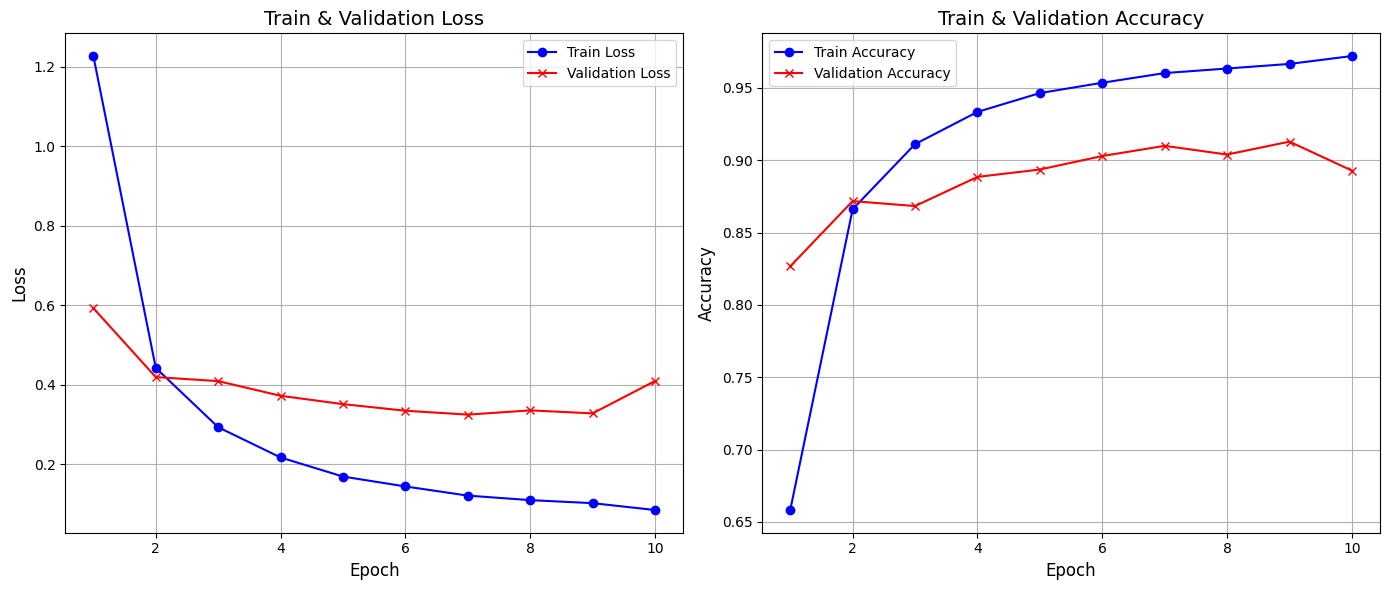

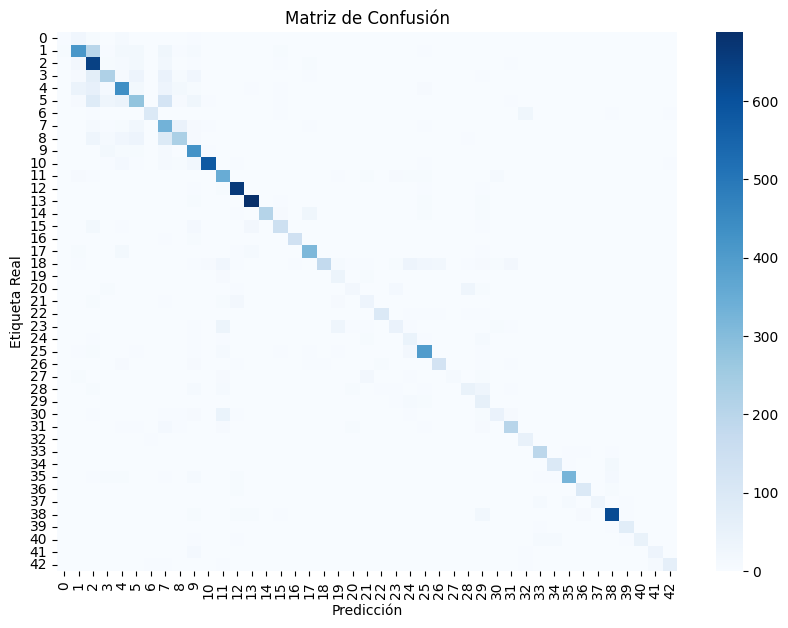

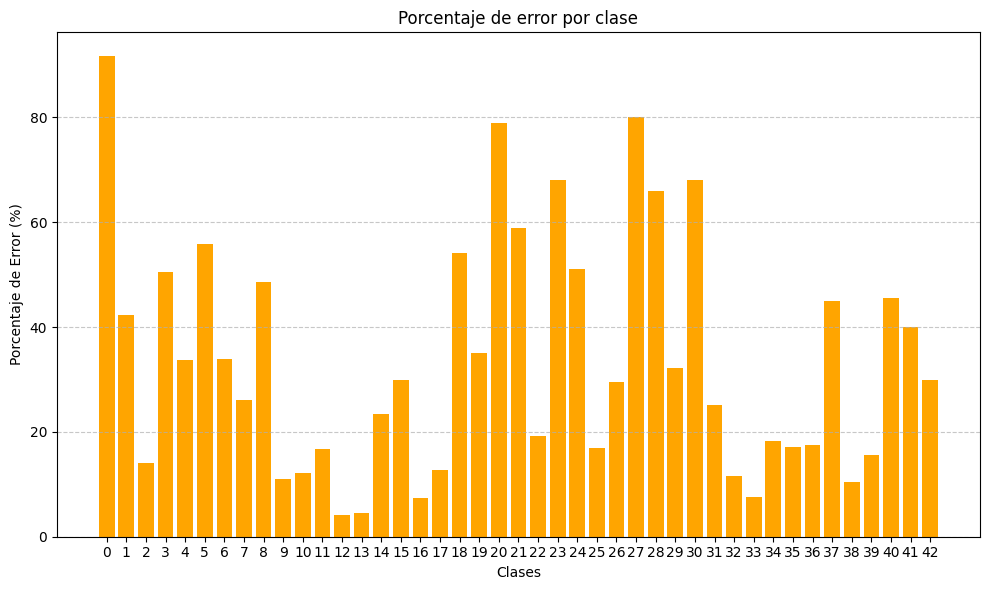

In [ ]:
# Instancia el modelo

model = CNN(43)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='cnn_shuffle'
train_loss_df, val_loss_df, test_loss, test_accuracy =train_and_evaluate(model,
                                                                           train_loader_shuffle, valid_loader_shuffle,
                                                                           loss_fn, optimizer, device,
                                                                           num_epochs,
                                                                           test_loader_shuffle, 'cnn_shuffle')




# Guarda el modelo. Usa
file_name='cnn_shuffle.pth'
save_full_model(model, file_name)

# Carga los datos y muéstralos
train_loss_file = 'train_loss_cnn_shuffle.csv'
valid_loss_file = 'valid_loss_cnn_shuffle.csv'
train_accuracy_file = 'train_accuracy_cnn_shuffle.csv'
valid_accuracy_file = 'valid_accuracy_cnn_shuffle.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model, test_loader_shuffle, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

¿Cómo podrías explicar los resultados?


############## COMPLETAR ##############

Al hacer shuffle de píxeles, se pierde la relación estadística entre los píxeles vecinos, por lo que las CNNs no aprovechan su ventaja al no poder aprender esta información. Esto explica una precisión más baja para la CNN, del 72.72%, frente al 77.89% de precisión de la MLP, que obtiene un rendimiento similar, ya que no capturan las relaciones estadísticas al aprender.
############ Fin COMPLETAR ############

## **[Ejercicio 3]** Entrena una `FCNN` con las siguientes características:

1. Cuatro bloques convolucionales (conv2d -> batch norm -> ReLU).
2. Un bloque convolucional final con tantas características como clases haya (43)
3. Comprueba el número de parámetros entrenables y busca una configuración que no supere los **50.000** parámetros (aproximadamente 4 veces menos que la MLP).

In [ ]:
class FCNN(nn.Module):
    def __init__(self, output_dim):
        super(FCNN, self).__init__()

        # Primer bloque convolucional
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),

        )
        # Segundo bloque convolucional
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),

        )
        # Tercer bloque convolucional
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

        )
        # Cuarto bloque convolucional
        self.conv_block4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

        )
        # Bloque de salida
        self.output_block = nn.Conv2d(in_channels=32, out_channels=output_dim, kernel_size=1, stride=1, padding=0)



    def forward(self, x):
        # Primer bloque convolucional

        x=self.conv_block1(x)
        # Segundo bloque convolucional
        x=self.conv_block2(x)

        # Tercer bloque convolucional
        x=self.conv_block3(x)

        # Cuarto bloque convolucional
        x=self.conv_block4(x)

        # Capa de salida
        x = self.output_block(x)  # Salida (N, num_classes, 1, 1)
        x = torch.flatten(x, start_dim=1)  # Aplanar a (N, num_classes)
        return x

count_trainable_params(FCNN(output_dim=43))

48571

Añade el modelo a tu archivo `models.py`.

### Entrena la FCNN con el dataset original (sin permutar)

> Añadir blockquote



* `train_loader`
* `valid_loader`
* `test_loader`

Guarda el modelo como `fcnn.pth` y los resultados de `loss`y `accuracy` con la misma extensión:

Epoch [1/10], Train Loss: 1.2131, Train Accuracy: 0.7024, Validation Loss: 0.4984, Validation Accuracy: 0.8542
Epoch [2/10], Train Loss: 0.3704, Train Accuracy: 0.8935, Validation Loss: 0.2898, Validation Accuracy: 0.9157
Epoch [3/10], Train Loss: 0.2224, Train Accuracy: 0.9347, Validation Loss: 0.2999, Validation Accuracy: 0.9126
Epoch [4/10], Train Loss: 0.1737, Train Accuracy: 0.9472, Validation Loss: 0.2529, Validation Accuracy: 0.9267
Epoch [5/10], Train Loss: 0.1262, Train Accuracy: 0.9613, Validation Loss: 0.2335, Validation Accuracy: 0.9343
Epoch [6/10], Train Loss: 0.1109, Train Accuracy: 0.9660, Validation Loss: 0.2285, Validation Accuracy: 0.9337
Epoch [7/10], Train Loss: 0.0838, Train Accuracy: 0.9742, Validation Loss: 0.2119, Validation Accuracy: 0.9431
Epoch [8/10], Train Loss: 0.0836, Train Accuracy: 0.9737, Validation Loss: 0.1898, Validation Accuracy: 0.9484
Epoch [9/10], Train Loss: 0.0654, Train Accuracy: 0.9787, Validation Loss: 0.2081, Validation Accuracy: 0.9440
E

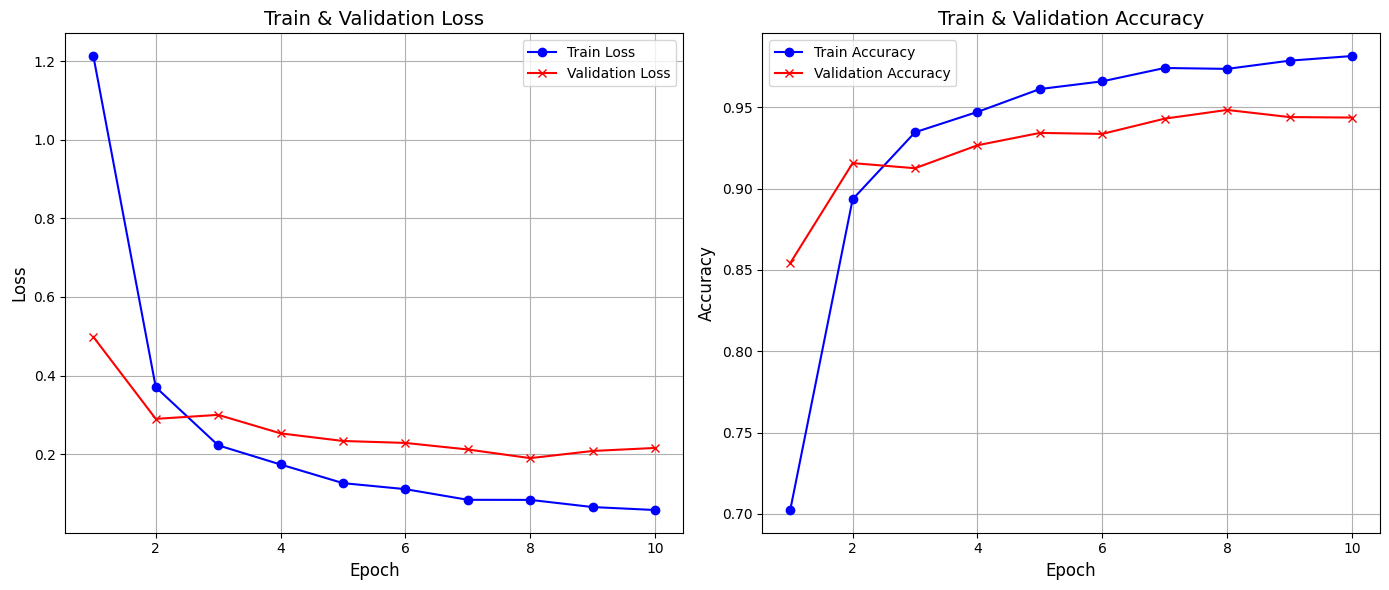

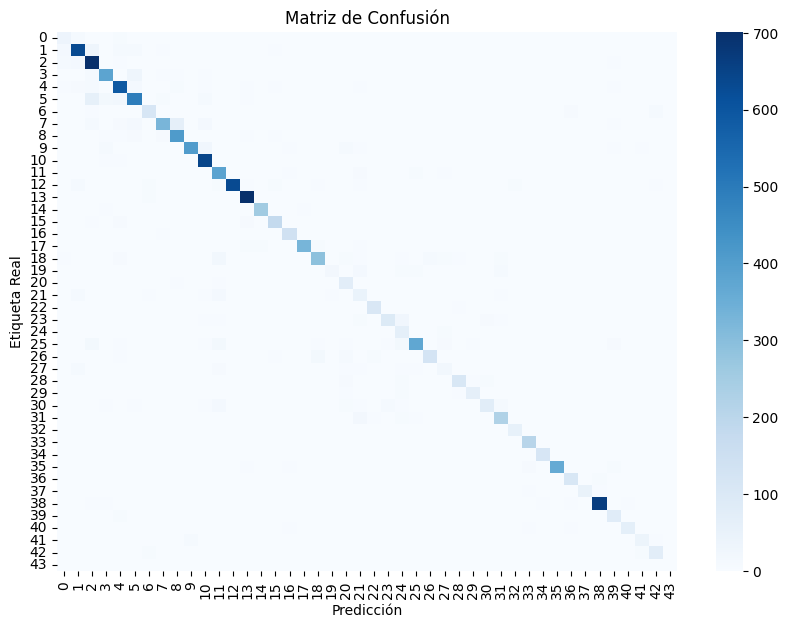

/content/utils.py:248: RuntimeWarning: invalid value encountered in divide
  error_per_class = errors_per_class / total_per_class


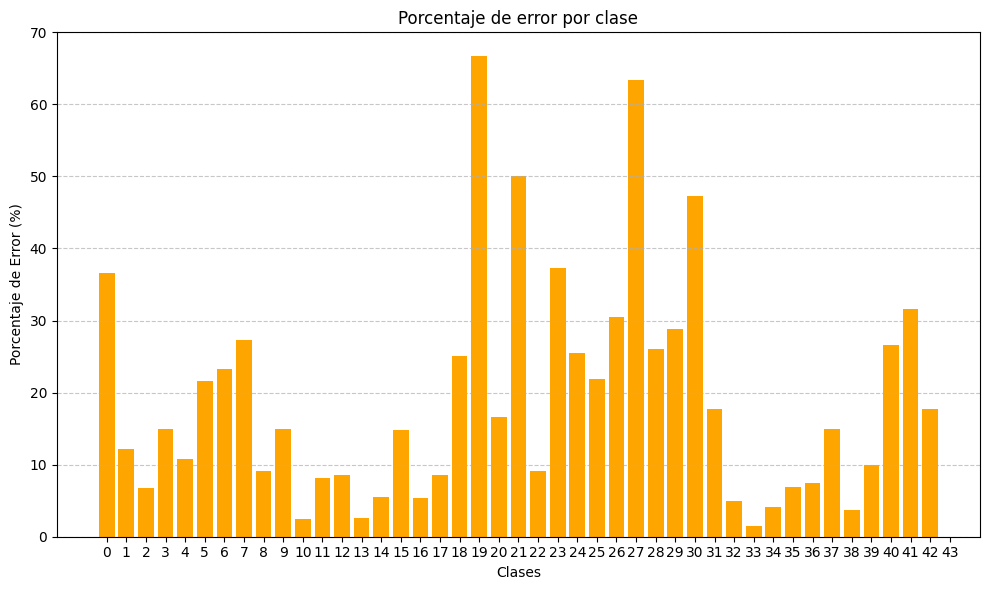

In [ ]:
# Instancia el modelo
model_fcnn =FCNN(43).to(device)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model_fcnn.parameters(), lr= 0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='fcnn'
train_loss_df, val_loss_df, test_loss, test_accuracy =train_and_evaluate(model_fcnn,
                                                                           train_loader, valid_loader,
                                                                           loss_fn, optimizer, device,
                                                                           num_epochs,
                                                                           test_loader, 'fcnn')


# Guarda el modelo. Usa
file_name='fcnn.pth'
save_full_model(model_fcnn, file_name)

# Carga los datos y muéstralos
train_loss_file = 'train_loss_fcnn.csv'
valid_loss_file = 'valid_loss_fcnn.csv'
train_accuracy_file = 'train_accuracy_fcnn.csv'
valid_accuracy_file = 'valid_accuracy_fcnn.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model_fcnn, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

# **[Ejercicio 4]** Reto final: entrena el mejor modelo que puedas.

1. Crea un modelo con las características que quieras siempre y cuando no supere los **200.000** parámetros.
2. Entrena con el optimizador y estrategias (`learning rate schedulers`, `normalization`, etc) que quieras, siempre y cuando no entrenes más de **10 épocas**.
3. Puedes normalizar los datos y hacer data-augmentation.
4. Guarda el modelo en tu archivo `models.py` y llámalo: `MyBestModel`.

In [ ]:
import torch
import torch.nn as nn

class MyBestModel(nn.Module):
    def __init__(self, num_classes=43):
        super(MyBestModel, self).__init__()

        # Bloques convolucionales
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.block2= nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.block3= nn.Sequential(nn.Conv2d(32, 64, kernel_size=5, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
         # Bloque de salida
        self.output_block = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=num_classes, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(num_classes),
        )

        # Global average pooling
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.output_block(x)
        x = self.global_avg_pool(x)
        x = torch.flatten(x, start_dim=1)
        return x
# Crear el modelo
model = MyBestModel(num_classes=43)
print(f"Parámetros entrenables: {count_trainable_params(model)}")


Parámetros entrenables: 147985


In [ ]:
from torch.utils.data import DataLoader
import torch

def compute_mean_std(dataset):
    """
    Calcula la media y la desviación estándar de los canales RGB en un dataset.
    """
    loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)
    mean = 0.0
    std = 0.0
    total_samples = 0

    # Itera por el DataLoader
    for images, _ in loader:
        batch_samples = images.size(0)  # Número de imágenes en el batch
        total_samples += batch_samples

        # Calcula la media y desviación estándar por lote (en los ejes [N, H, W])
        mean += images.mean(dim=(0, 2, 3)) * batch_samples
        std += images.std(dim=(0, 2, 3)) * batch_samples

    # Promedia los resultados acumulados
    mean /= total_samples
    std /= total_samples
    return mean, std

# Dataset sin transformaciones que alteren los valores
dataset = GTS(csv_file='train.csv', root_dir='./data', transform=transforms.ToTensor())

# Calcula la media y desviación estándar
mean, std = compute_mean_std(dataset)

print(f"Media (R, G, B): {mean}")
print(f"Desviación estándar (R, G, B): {std}")


Media (R, G, B): tensor([0.3221, 0.2954, 0.3043])
Desviación estándar (R, G, B): tensor([0.2758, 0.2639, 0.2706])


In [ ]:
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.RandomRotation(3),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])

valid_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])


# Aplica las transformaciones a los datasets
train_dataset = GTS(csv_file='train.csv', root_dir='./data', transform=train_transform)
valid_dataset = GTS(csv_file='valid.csv', root_dir='./data', transform=valid_test_transform)
test_dataset = GTS(csv_file='test.csv', root_dir='./data', transform=valid_test_transform)


In [ ]:
from torch.utils.data import WeightedRandomSampler

##################### COMPLETAR #######################
batch_size = 16

# Paso 1: Calcular el histograma (frecuencias por clase)

labels = [train_dataset[idx][1] for idx in range(len(train_dataset))]
labels_tensor= torch.tensor(labels)
histograma= torch.histc(labels_tensor.float(), bins=len(set(labels_tensor)), min=labels_tensor.min(), max=labels_tensor.max())
class_counts = torch.bincount(labels_tensor)


# Paso 2: Asignar pesos inversamente proporcionales a las frecuencias
max_count = class_counts.max().float()
class_weights = max_count / (class_counts.float() )


# Paso 3: Asignar pesos a cada ejemplo del dataset
sample_weights = class_weights[labels_tensor]

# Paso 4: Crear el WeightedRandomSampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(train_dataset), replacement=True)

# Paso 5: Crear el DataLoader con el sampler
train_dataloader_uniform = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

In [ ]:
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
# Instancia el modelo
mybest =MyBestModel(43).to(device)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(mybest.parameters(), lr= 0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='fcnn'
train_loss_df, val_loss_df, test_loss, test_accuracy =train_and_evaluate(mybest,
                                                                           train_dataloader_uniform, valid_loader,
                                                                           loss_fn, optimizer, device,
                                                                           num_epochs,
                                                                           test_loader, 'mybest')

# Guarda el modelo. Usa
file_name='mybest.pth'
save_full_model(mybest, file_name)

# Carga los datos y muéstralos
train_loss_file = 'train_loss_mybest.csv'
valid_loss_file = 'valid_loss_mybest.csv'
train_accuracy_file = 'train_accuracy_mybest.csv'
valid_accuracy_file = 'valid_accuracy_mybest.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(mybest, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

In [ ]:
# Instancia el modelo
mybest2 =MyBestModel(43).to(device)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer2 = Adam(mybest2.parameters(), lr= 0.001, weight_decay=1e-4)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='fcnn'
train_loss_df, val_loss_df, test_loss, test_accuracy =train_and_evaluate(mybest2,
                                                                           train_dataloader_uniform, valid_loader,
                                                                           loss_fn, optimizer2, device,
                                                                           num_epochs,
                                                                           test_loader, 'mybest')

# Guarda el modelo. Usa
file_name='mybest2.pth'
save_full_model(mybest2, file_name)

# Carga los datos y muéstralos
train_loss_file = 'train_loss_mybest2.csv'
valid_loss_file = 'valid_loss_mybest2.csv'
train_accuracy_file = 'train_accuracy_mybest2.csv'
valid_accuracy_file = 'valid_accuracy_mybest2.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(mybest, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

In [ ]:
# Guarda el modelo. Usa
file_name='mybest2.pth'
save_full_model(mybest2, file_name)

# Carga los datos y muéstralos
train_loss_file = 'train_loss_mybest.csv'
valid_loss_file = 'valid_loss_mybest.csv'
train_accuracy_file = 'train_accuracy_mybest.csv'
valid_accuracy_file = 'valid_accuracy_mybest.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(mybest, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

In [ ]:
# Instancia el modelo
mybest2 =MyBestModel(43).to(device)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer2 = Adam(mybest2.parameters(), lr= 0.001, weight_decay=1e-4)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='fcnn'
train_loss_df, val_loss_df, test_loss, test_accuracy =train_and_evaluate(mybest2,
                                                                           train_dataloader_uniform, valid_loader,
                                                                           loss_fn, optimizer2, device,
                                                                           num_epochs,
                                                                           test_loader, 'mybest2')

# Guarda el modelo. Usa
file_name='mybest2.pth'
save_full_model(mybest2, file_name)

# Carga los datos y muéstralos
train_loss_file = 'train_loss_mybest2.csv'
valid_loss_file = 'valid_loss_mybest2.csv'
train_accuracy_file = 'train_accuracy_mybest2.csv'
valid_accuracy_file = 'valid_accuracy_mybest2.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(mybest, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)